# **HUMAN ACTIVITY PREDICTION**



---



---









# Company Introduction

client for this project is a Smartphone Company.

They want to predict the human activity and draw other insights like signs of fatigue in an individual for fitness monitoring.

They want to monitor six basic activities: three static postures (standing, sitting, lying) and three dynamic activities (walking, walking downstairs and walking upstairs).

One of the key measurements in this process is prediction of these six activities.

# Problem Statement 

**Current Scenario**

The company has captured data of 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz using the embedded accelerometer and gyroscope of the device. The experiments were video-recorded to label the data manually.

Machine learning can help to study data from sensors which are already present in most smartphones and can be analysed to gain rich insights about the candidates/users.

**The current scenario has the following problems :**

The company has collected a large amount of sensor data from smartphones but is not able to use it efficiently.
This data can be utilized to achieve various goals that can help an individual for better health like activity detection and also monitor signs of fatigue.



# Import Libraries 

In [46]:
from re import X
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
pd.set_option("mode.chained_assignment", None)
pd.set_option("display.float_format", lambda x : '%.5f' % x)
pd.set_option("display.max_colwidth", None)
from random import randint                                          # Importing to generate random integers
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix   

In [65]:
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 
sns.set()

# Data Extraction

In [138]:
train = pd.read_csv("/content/hacr_train.csv")
test = pd.read_csv("/content/hacr_test.csv")
sample = pd.read_csv("/content/sample_submission.csv")

In [4]:
train.shape , test.shape

((2887, 563), (722, 562))

In [139]:
test.head(1)

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.arCoeff.Z.

In [5]:
train.head(1)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.a

In [8]:
train.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.arCoeff.Z.

In [12]:
train.activity.value_counts()

STANDING              550
LAYING                529
SITTING               491
WALKING               477
WALKING_UPSTAIRS      444
WALKING_DOWNSTAIRS    396
Name: activity, dtype: int64

In [136]:
sample.head(2)

,811,WALKING_UPSTAIRS
0,8965,WALKING_UPSTAIRS
1,5000,WALKING_UPSTAIRS


In [17]:
train.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
tBodyAcc.std.X                         0
tBodyAcc.std.Y                         0
tBodyAcc.std.Z                         0
tBodyAcc.mad.X                         0
tBodyAcc.mad.Y                         0
tBodyAcc.mad.Z                         0
tBodyAcc.max.X                         0
tBodyAcc.max.Y                         0
tBodyAcc.max.Z                         0
tBodyAcc.min.X                         0
tBodyAcc.min.Y                         0
tBodyAcc.min.Z                         0
tBodyAcc.sma                           0
tBodyAcc.energy.X                      0
tBodyAcc.energy.Y                      0
tBodyAcc.energy.Z                      0
tBodyAcc.iqr.X                         0
tBodyAcc.iqr.Y                         0
tBodyAcc.iqr.Z                         0
tBodyAcc.entropy

In [148]:
train.duplicated().sum()


0

**Observations:**

- There are total **563** features with **2887** observations in **Train** data set . 
- There are total **562** features with **722** observations in **Test** data set . 
- There are **no missing** values in dataset . 
- There are **no duplicates** in dataset . 
- There are 6 classes present in target column( activity). They are **STANDING , SITTING ,LAYING,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS**

# **EDA**

1. Frequency Distribution of Activity 

Text(0, 0.5, 'Counts')

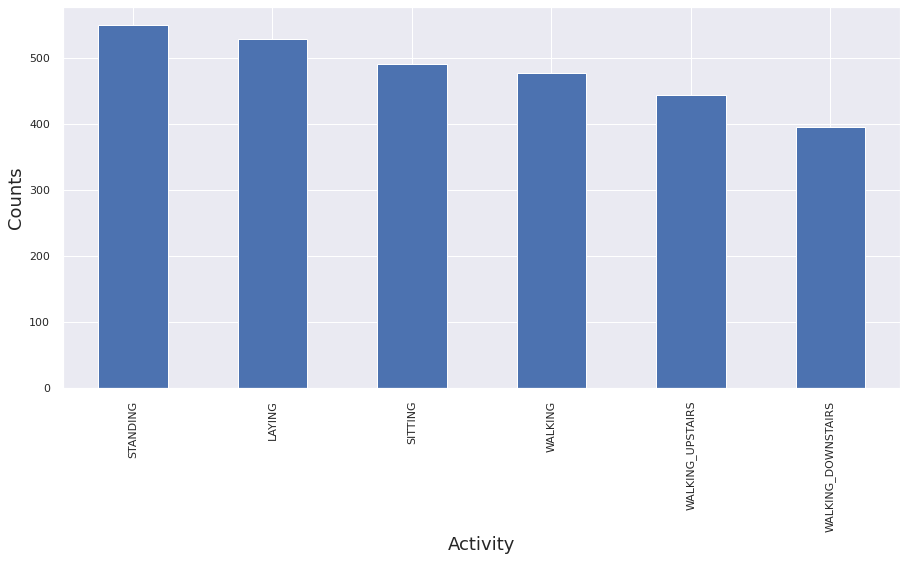

In [69]:
fig = plt.figure(figsize= [15,7])
train['activity'].value_counts().plot(kind = 'bar')
plt.xlabel('Activity' , fontsize = 18)
plt.ylabel('Counts' , fontsize = 18)

Obesrvation:

- From above plot we can see that there are more number of STANDING activity happened compare to other activity . 

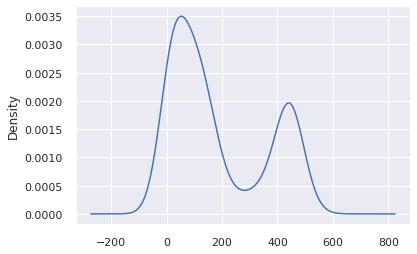

In [75]:
train[train['activity'] == 'STANDING'].nunique().plot(kind = 'kde')

In [101]:
train[train['activity'] == 'WALKING'].nunique().sort_values(ascending = False)[1:10]

tBodyAccJerk.correlation.X.Y           437
tGravityAcc.correlation.Y.Z            432
tBodyGyroMag.arCoeff1                  429
angle.tBodyAccJerkMean.gravityMean     426
angle.tBodyAccMean.gravity             426
tGravityAcc.correlation.X.Z            426
tBodyGyro.mean.X                       423
tBodyGyroJerk.arCoeff.Z.3              419
angle.tBodyGyroJerkMean.gravityMean    418
dtype: int64

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

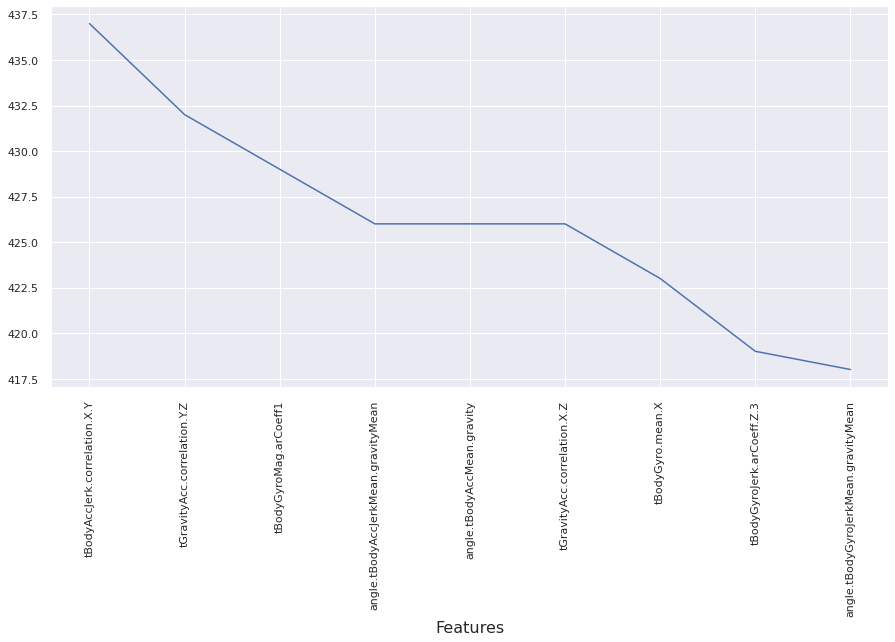

In [112]:
fig = plt.figure(figsize = [15,7])
train[train['activity'] == 'WALKING'].nunique().sort_values(ascending = False)[1:10].plot(kind = 'line')
plt.xlabel('Features', fontsize = 16)
plt.xticks(rotation =90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

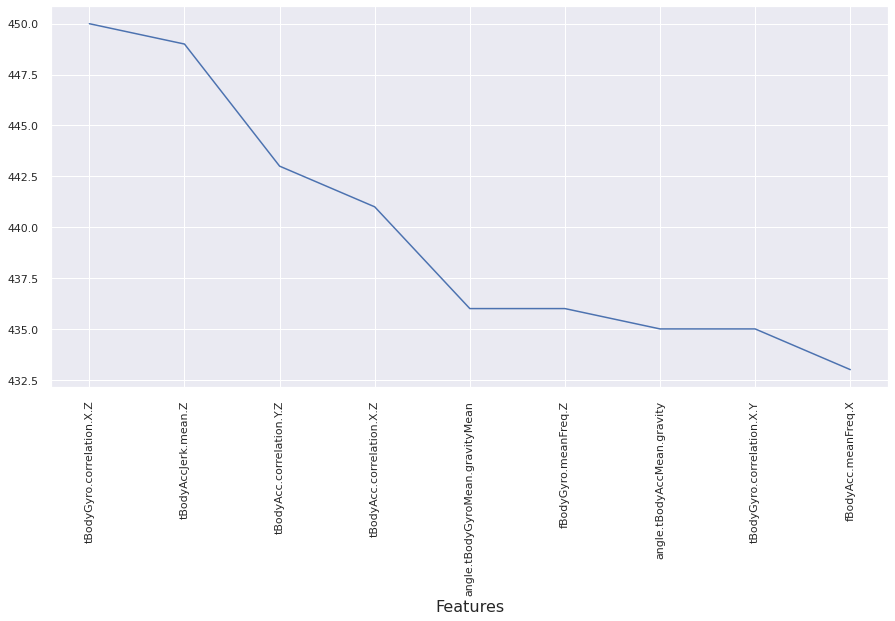

In [119]:
fig = plt.figure(figsize = [15,7])
train[train['activity'] == 'SITTING'].nunique().sort_values(ascending = False)[1:10].plot(kind = 'line')
plt.xlabel('Features', fontsize = 16)
plt.xticks(rotation =90)

# **Feature Selection using Random Forest**
Random forests are one the most popular machine learning algorithms because they provide:

a good predictive performance,
low overfitting and
easy interpretability.
This interpretability is derived from the importance of each feature on the tree decision evaluated on the reduction in impurity.

In other words, it is easy to compute how much each feature is contributing to the decision.

Below we have implemented a function namely, SelectFromModel available in Sklearn which uses the base estimator to identify important features.

The importance of feature is determined on the basis of threshold (a measure to calculate feature importance).





In [19]:
df_train = train.copy()
df_test = test.copy()

In [20]:
df_train.drop('rn',axis = 1 , inplace = True)

In [21]:
x = df_train.drop('activity',axis =1)
y = df_train['activity']

In [26]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

# Extracting list of important features
selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 130
Threshold set by Model: 0.0
Features: ['tBodyAcc.std.X', 'tBodyAcc.mad.X', 'tBodyAcc.max.X', 'tBodyAcc.sma', 'tBodyAcc.energy.X', 'tBodyAcc.entropy.X', 'tBodyAcc.correlation.X.Y', 'tBodyAcc.correlation.Y.Z', 'tGravityAcc.mean.X', 'tGravityAcc.mean.Y', 'tGravityAcc.mean.Z', 'tGravityAcc.std.X', 'tGravityAcc.std.Y', 'tGravityAcc.mad.Y', 'tGravityAcc.max.X', 'tGravityAcc.max.Y', 'tGravityAcc.max.Z', 'tGravityAcc.min.X', 'tGravityAcc.min.Y', 'tGravityAcc.min.Z', 'tGravityAcc.sma', 'tGravityAcc.energy.X', 'tGravityAcc.energy.Y', 'tGravityAcc.energy.Z', 'tGravityAcc.entropy.X', 'tGravityAcc.entropy.Y', 'tGravityAcc.arCoeff.X.1', 'tGravityAcc.arCoeff.X.2', 'tGravityAcc.arCoeff.X.3', 'tGravityAcc.arCoeff.X.4', 'tGravityAcc.arCoeff.Y.1', 'tGravityAcc.arCoeff.Y.2', 'tGravityAcc.arCoeff.Y.3', 'tGravityAcc.arCoeff.Y.4', 'tGravityAcc.arCoeff.Z.1', 'tGravityAcc.arCoeff.Z.2', 'tGravityAcc.arCoeff.Z.3', 'tGravityAcc.arCoeff.Z.4', 'tGravityAcc.correlation.X.Y', 'tBodyAcc

We can observe that random forest has finalized 130 features out of 563 features.

Now we will move to data preparation for model development. 

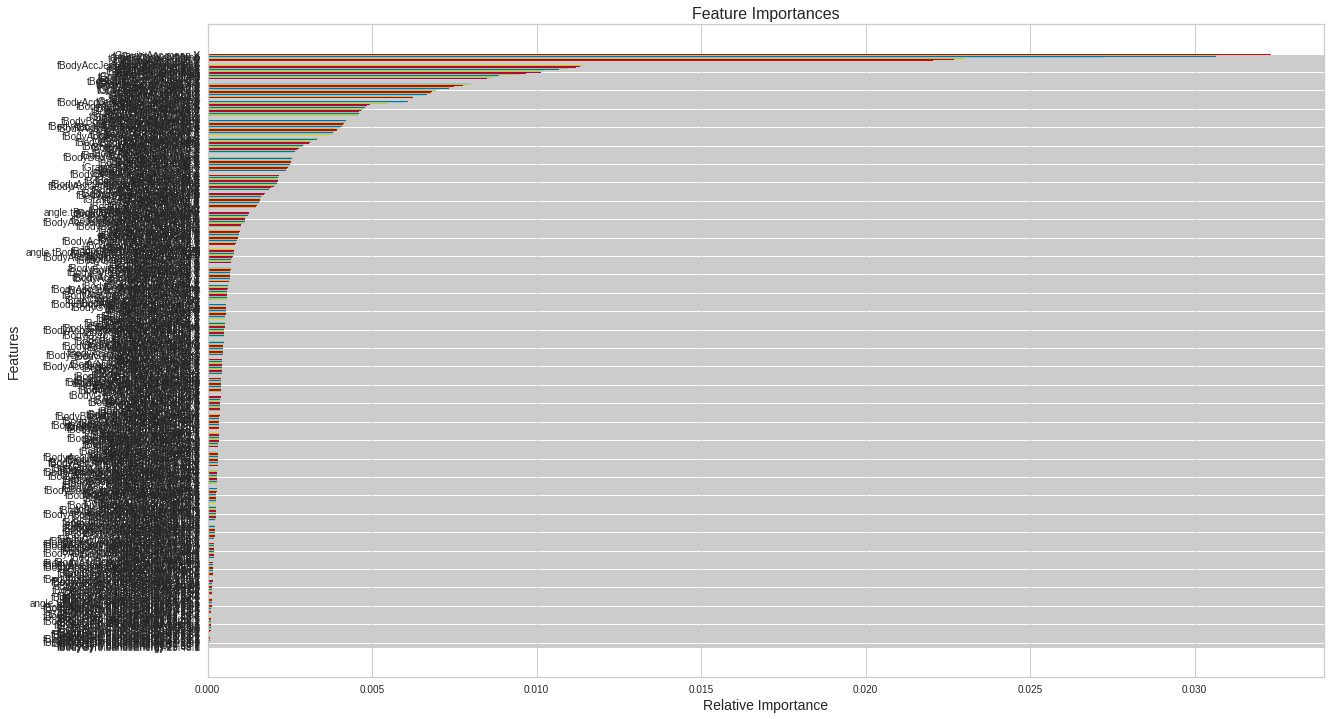

In [27]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [37]:
# label Encoding for target column
re_col = {'STANDING' : 0 ,'LAYING': 1 , 'SITTING' :2 ,'WALKING' :3 ,'WALKING_UPSTAIRS':4,'WALKING_DOWNSTAIRS' : 5}
df_train['activity'] = df_train['activity'].replace(re_col)

In [38]:
X = df_train[selected_feat]
y = df_train['activity']

In [39]:
df_train.head(1)

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.arCo

In [47]:
def model_eval(actual,predicted):
    acc_score = accuracy_score(actual , predicted)
    con_matrix = confusion_matrix(actual , predicted)
    class_report = classification_report(actual , predicted)
    print('The accuracy of the model is : ' ,acc_score)
    print(con_matrix)
    print(class_report)

**Split the dataset in to train and test**

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42 ,stratify = y)

**Logistic Regression**

In [42]:
reg = LogisticRegression()

In [128]:
#Fitting the data in to logistic model and predicting test and train 
reg.fit(x_train,y_train)
y_pred_reg = reg.predict(x_train)
y_pred_reg_test = reg.predict(x_test)

In [50]:
model_eval(y_train,y_pred_reg)

The accuracy of the model is :  0.964053702901689
[[408   0  32   0   0   0]
 [  0 423   0   0   0   0]
 [ 32   0 361   0   0   0]
 [  0   0   0 377   4   0]
 [  0   0   0   6 347   2]
 [  0   0   0   2   5 310]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       440
           1       1.00      1.00      1.00       423
           2       0.92      0.92      0.92       393
           3       0.98      0.99      0.98       381
           4       0.97      0.98      0.98       355
           5       0.99      0.98      0.99       317

    accuracy                           0.96      2309
   macro avg       0.97      0.97      0.97      2309
weighted avg       0.96      0.96      0.96      2309



In [129]:
model_eval(y_test,y_pred_reg_test)

The accuracy of the model is :  0.9636678200692042
[[100   0  10   0   0   0]
 [  0 106   0   0   0   0]
 [  5   0  93   0   0   0]
 [  0   0   0  93   2   1]
 [  0   0   0   1  88   0]
 [  0   0   0   1   1  77]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       110
           1       1.00      1.00      1.00       106
           2       0.90      0.95      0.93        98
           3       0.98      0.97      0.97        96
           4       0.97      0.99      0.98        89
           5       0.99      0.97      0.98        79

    accuracy                           0.96       578
   macro avg       0.96      0.97      0.96       578
weighted avg       0.96      0.96      0.96       578



In [59]:
rf = RandomForestClassifier(n_estimators =300 , max_depth = 10 , min_samples_split = 5 , random_state = 42)

In [60]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [61]:
model_eval(y_train,y_pred_rf)

The accuracy of the model is :  0.9939367691641403
[[440   0   0   0   0   0]
 [  0 423   0   0   0   0]
 [ 11   0 382   0   0   0]
 [  0   0   0 381   0   0]
 [  0   0   0   0 355   0]
 [  0   0   0   0   3 314]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       1.00      1.00      1.00       423
           2       1.00      0.97      0.99       393
           3       1.00      1.00      1.00       381
           4       0.99      1.00      1.00       355
           5       1.00      0.99      1.00       317

    accuracy                           0.99      2309
   macro avg       0.99      0.99      0.99      2309
weighted avg       0.99      0.99      0.99      2309



In [62]:
model_eval(y_test,y_pred_test_rf)

The accuracy of the model is :  0.9636678200692042
[[103   0   7   0   0   0]
 [  0 106   0   0   0   0]
 [  6   0  92   0   0   0]
 [  0   0   0  93   2   1]
 [  0   0   0   0  88   1]
 [  0   0   0   2   2  75]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       110
           1       1.00      1.00      1.00       106
           2       0.93      0.94      0.93        98
           3       0.98      0.97      0.97        96
           4       0.96      0.99      0.97        89
           5       0.97      0.95      0.96        79

    accuracy                           0.96       578
   macro avg       0.96      0.96      0.96       578
weighted avg       0.96      0.96      0.96       578



**Appling best model on test data**

In [140]:
pred_test = reg.predict(test[selected_feat])

In [141]:
test['activity'] = pred_test

In [143]:
test.head(2)

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.arCoeff.Z.

In [145]:
re_col1 = { 0: 'STANDING',1: 'LAYING', 2: 'SITTING',3:'WALKING' ,4:'WALKING_UPSTAIRS',5:'WALKING_DOWNSTAIRS'}

In [146]:
test['activity'] = test['activity'].replace(re_col1)

In [147]:
sample1= test[['rn','activity']]

sample1.to_csv("sample1.csv", index=False,header = False)

sample1.head()

,rn,activity
0,811,WALKING_DOWNSTAIRS
1,8965,WALKING
2,5000,WALKING
3,1200,SITTING
4,9812,LAYING
